In [1]:
!pip install datasets tabulate

In [2]:
!huggingface-cli login #


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.c

In [9]:
from tabulate import tabulate
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [4]:
dataset = load_dataset("bigcode/commitpackft", "python")

In [5]:
df = pd.DataFrame(dataset['train'])
df.head()

,commit,old_file,new_file,old_contents,new_contents,subject,message,lang,license,repos
0,e905334869af72025592de586b81650cb3468b8a,sentry/queue/client.py,sentry/queue/client.py,"""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...","""""""\nsentry.queue.client\n~~~~~~~~~~~~~~~~~~~\...",Declare queues when broker is instantiated,Declare queues when broker is instantiated\n,Python,bsd-3-clause,"imankulov/sentry,BuildingLink/sentry,zenefits/..."
1,45fc612fdc5a354dbf0bacccd345b1aebcc73e59,tests/test_openweather.py,tests/test_openweather.py,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,# -*- coding: utf-8 -*-\nimport bot_mock\nfrom...,"Revert ""Fix openweather unit tests""","Revert ""Fix openweather unit tests""\n\nThis re...",Python,bsd-3-clause,"rnyberg/pyfibot,EArmour/pyfibot,aapa/pyfibot,a..."
2,22faee82e1f070532c0dfe5777136e842233a1f0,src/dashboard/src/main/templatetags/percentage.py,src/dashboard/src/main/templatetags/percentage.py,"from django.template import Node, Library\n\nr...","from django.template import Node, Library\n\nr...","Fix % only showing 0 or 100%, everything betwe...","Fix % only showing 0 or 100%, everything betwe...",Python,agpl-3.0,"artefactual/archivematica-history,artefactual/..."
3,950ac9130bafe1fced578bf61d746b047830bfa0,automata/base/exceptions.py,automata/base/exceptions.py,"#!/usr/bin/env python3\n""""""Exception classes s...","#!/usr/bin/env python3\n""""""Exception classes s...","Remove ""validation"" from RejectionException do...","Remove ""validation"" from RejectionException do...",Python,mit,caleb531/automata
4,462ae981ed5b9cc9a8f46e97dfe7908c0827ea64,account_invoice_line_description/res_config.py,account_invoice_line_description/res_config.py,# -*- coding: utf-8 -*-\n#####################...,# -*- coding: utf-8 -*-\n#####################...,"Fix implied_group, it still refers to the old ...","Fix implied_group, it still refers to the old ...",Python,agpl-3.0,"Antiun/account-invoicing,hbrunn/account-invoic..."
...,...,...,...,...,...,...,...,...,...,...
56020,cfb50f4ff62770c397634897e09497b74b396067,notifications/level_starting.py,notifications/level_starting.py,from consts.notification_type import Notificat...,from consts.notification_type import Notificat...,Add event key to comp level starting notification,Add event key to comp level starting notificat...,Python,mit,"josephbisch/the-blue-alliance,synth3tk/the-blu..."
56021,0177066012b3373753cba8baf86f00a365d7147b,findaconf/tests/config.py,findaconf/tests/config.py,# coding: utf-8\n\nfrom decouple import config...,# coding: utf-8\n\nfrom decouple import config...,Fix bug that used dev db instead of test db,Fix bug that used dev db instead of test db\n,Python,mit,"cuducos/findaconf,koorukuroo/findaconf,cuducos..."
56022,592df76f77c3450ba56b249ab0cd4404c8dd99e2,bundle_graph.py,bundle_graph.py,#!/usr/bin/python3\n\nfrom random import randi...,#!/usr/bin/python3\n\nfrom random import randi...,Update validation check for paper bundles.,Update validation check for paper bundles.\n,Python,mit,haoyueping/peer-grading-for-MOOCs
56023,86cfa4e3b60962fa04185efb6500fa6a6c0f4880,infosystem/subsystem/route/resource.py,infosystem/subsystem/route/resource.py,from sqlalchemy import UniqueConstraint\nfrom ...,from sqlalchemy import UniqueConstraint\nfrom ...,Change admin attribute to sysadmin,Change admin attribute to sysadmin\n,Python,apache-2.0,samueldmq/infosystem


In [6]:
print(f"Number of rows: {len(df)}")
print(f"Columns: {', '.join(df.columns)}")

summary_stats = df.describe().transpose()
print("\nSummary Statistics:")
print(tabulate(summary_stats, headers='keys', tablefmt='fancy_grid'))

print("\nValue Counts:")
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"\n{column.capitalize()} (Top 5):\n{tabulate(value_counts.head().reset_index(), headers=['Value', 'Count'], tablefmt='fancy_grid')}")


Number of rows: 56025
Columns: commit, old_file, new_file, old_contents, new_contents, subject, message, lang, license, repos

Summary Statistics:
╒══════════════╤═════════╤══════════╤══════════════════════════════════════════════════════════════════════════════════════════════════╤════════╕
│              │   count │   unique │ top                                                                                              │   freq │
╞══════════════╪═════════╪══════════╪══════════════════════════════════════════════════════════════════════════════════════════════════╪════════╡
│ commit       │   56025 │    56025 │ e905334869af72025592de586b81650cb3468b8a                                                         │      1 │
├──────────────┼─────────┼──────────┼──────────────────────────────────────────────────────────────────────────────────────────────────┼────────┤
│ old_file     │   56025 │    40480 │ setup.py                                                                             

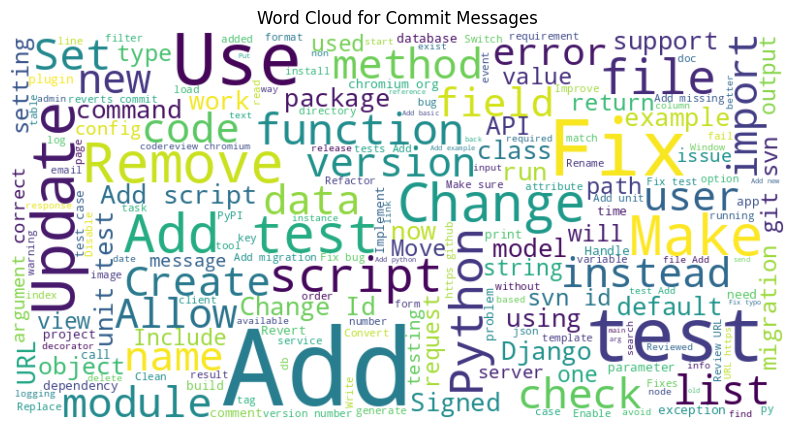

In [7]:
messages = " ".join(df['message'].astype(str))
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(messages)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Commit Messages')
plt.show()

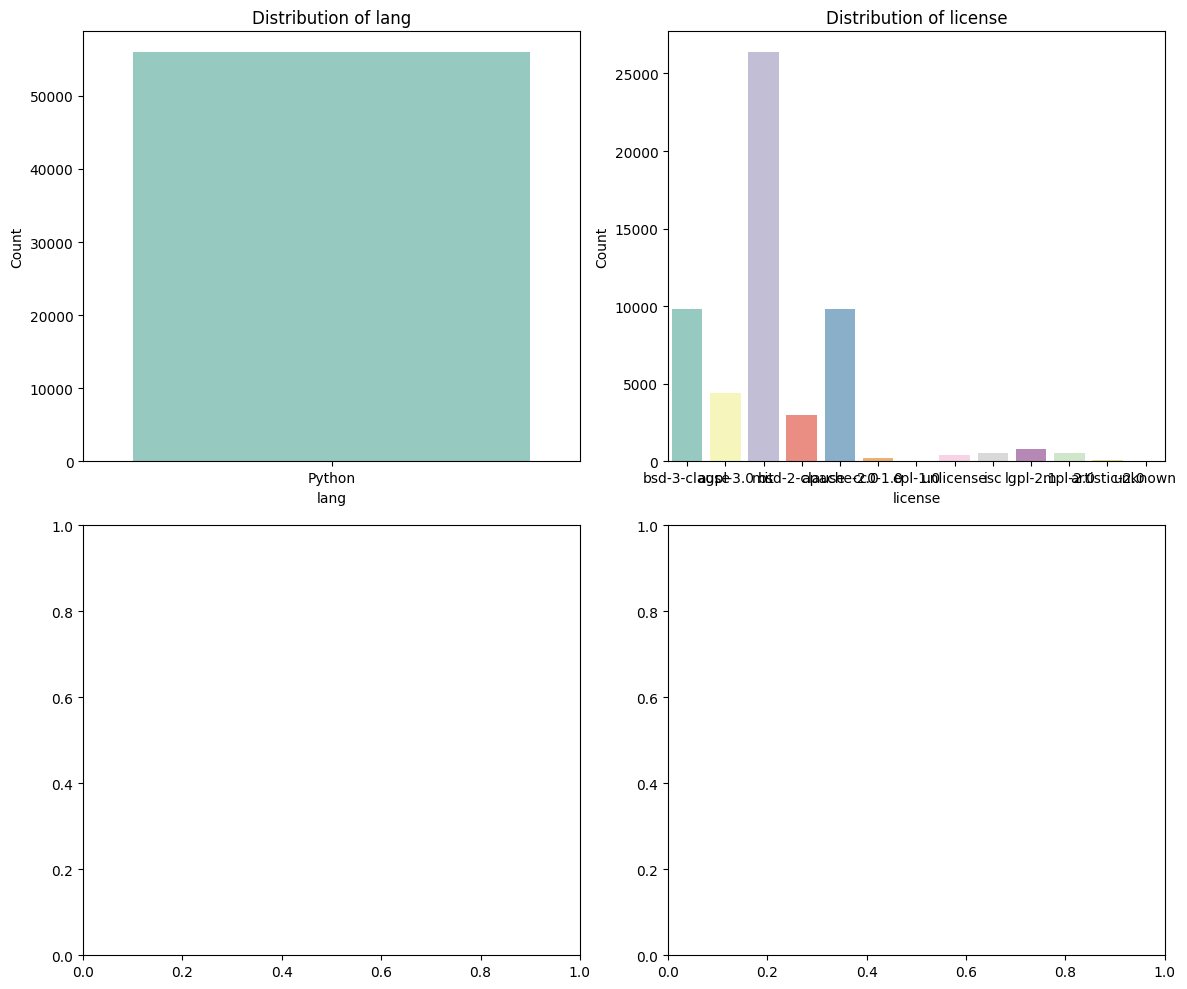

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
for i, column in enumerate(['lang', 'license']):
    sns.countplot(x=column, data=df, ax=axes[i // 2, i % 2], palette='Set3')
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')
    axes[i // 2, i % 2].set_xlabel(column)
    axes[i // 2, i % 2].set_ylabel('Count')
plt.tight_layout()
plt.show()